In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_file_path = '../data/raw/complaints.csv' 

print(f"Attempting to load data from: {data_file_path}")

try:

    columns_to_load = ['Product', 'Consumer complaint narrative', 'Complaint ID', 'Issue']
    df = pd.read_csv(data_file_path, usecols=columns_to_load)
    print("Dataset loaded successfully!")
    print(f"Initial shape of the dataset: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

except MemoryError:
    print("MemoryError: Full dataset too large to load directly. Loading in chunks...")

    chunk_size = 100000  
    chunks = []
    for i, chunk in enumerate(pd.read_csv(data_file_path, chunksize=chunk_size, usecols=columns_to_load)):
        chunks.append(chunk)
        print(f"Loaded chunk {i+1}...")
    df = pd.concat(chunks, ignore_index=True)
    print("Dataset loaded successfully by chunks!")
    print(f"Initial shape of the dataset: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {data_file_path}.")
    print("Please ensure the filename matches exactly and it's in the data/raw/ directory.")
except Exception as e:
    print(f"An unexpected error occurred while loading the data: {e}")

Matplotlib is building the font cache; this may take a moment.


Attempting to load data from: ../data/raw/complaints.csv
Dataset loaded successfully!
Initial shape of the dataset: (9609797, 4)

First 5 rows of the dataset:
                                             Product  \
0  Credit reporting or other personal consumer re...   
1                                    Debt collection   
2  Credit reporting or other personal consumer re...   
3  Credit reporting or other personal consumer re...   
4  Credit reporting or other personal consumer re...   

                                  Issue Consumer complaint narrative  \
0  Incorrect information on your report                          NaN   
1     Attempts to collect debt not owed                          NaN   
2           Improper use of your report                          NaN   
3           Improper use of your report                          NaN   
4  Incorrect information on your report                          NaN   

   Complaint ID  
0      14195687  
1      14195688  
2      14195689  

In [ ]:
print("\n--- Initial Data Overview ---")
print("\nData Types:")
print(df.dtypes)

print("\nMissing values (NaN) before preprocessing:")
print(df.isnull().sum())

print("\nDataFrame Info:")
df.info()

print("\nDataFrame Description:")
print(df.describe(include='all'))


--- Initial Data Overview ---

Data Types:
Product                         object
Issue                           object
Consumer complaint narrative    object
Complaint ID                     int64
dtype: object

Missing values (NaN) before preprocessing:
Product                               0
Issue                                 6
Consumer complaint narrative    6629041
Complaint ID                          0
dtype: int64

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 4 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Product                       object
 1   Issue                         object
 2   Consumer complaint narrative  object
 3   Complaint ID                  int64 
dtypes: int64(1), object(3)
memory usage: 293.3+ MB

DataFrame Description:
                                                  Product  \
count                                             9


--- Product Distribution Analysis ---

Distribution of complaints per Product:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service         

/tmp/ipykernel_10173/2384218699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')


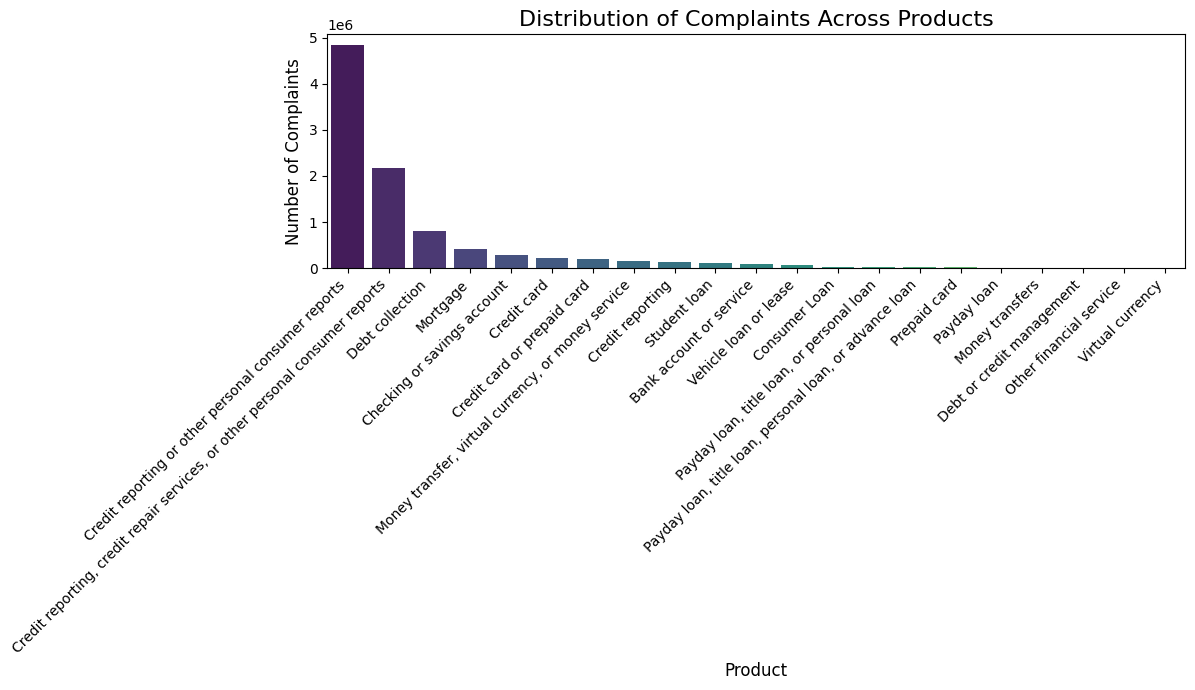

In [ ]:
print("\n--- Product Distribution Analysis ---")
product_distribution = df['Product'].value_counts()
print("\nDistribution of complaints per Product:")
print(product_distribution)

plt.figure(figsize=(12, 7))
sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')
plt.title('Distribution of Complaints Across Products', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


--- Consumer Complaint Narrative Analysis ---

Number of complaints with and without narratives:
has_narrative
False    6629041
True     2980756
Name: count, dtype: int64

Average narrative length (word count): 54.47
Maximum narrative length (word count): 6469
Minimum narrative length (word count): 0


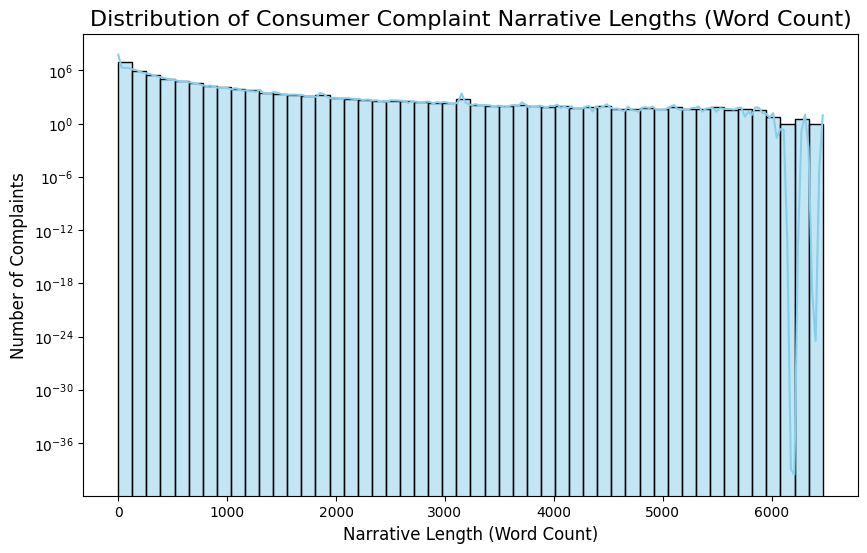

/tmp/ipykernel_10173/2344525534.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  very_short_narratives = df[df['narrative_length'] > 0][df['narrative_length'] < 5]



Number of very short narratives (1-4 words): 3175

Number of very long narratives (> 500 words): 160989


In [ ]:
print("\n--- Consumer Complaint Narrative Analysis ---")

df['has_narrative'] = df['Consumer complaint narrative'].notna()
narrative_counts = df['has_narrative'].value_counts()
print("\nNumber of complaints with and without narratives:")
print(narrative_counts)

df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(str(x).split()))

print(f"\nAverage narrative length (word count): {df['narrative_length'].mean():.2f}")
print(f"Maximum narrative length (word count): {df['narrative_length'].max()}")
print(f"Minimum narrative length (word count): {df['narrative_length'].min()}")

plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Consumer Complaint Narrative Lengths (Word Count)', fontsize=16)
plt.xlabel('Narrative Length (Word Count)', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.yscale('log') 
plt.show()

very_short_narratives = df[df['narrative_length'] > 0][df['narrative_length'] < 5]
print(f"\nNumber of very short narratives (1-4 words): {len(very_short_narratives)}")

very_long_narratives = df[df['narrative_length'] > 500] 
print(f"\nNumber of very long narratives (> 500 words): {len(very_long_narratives)}")


In [ ]:
print("\n--- Filtering and Cleaning Data ---")

target_products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later (BNPL)",
    "Savings account",
    "Money transfers",
]

print(f"\nFiltering for these product categories: {target_products}")

df_filtered_products = df[df['Product'].isin(target_products)].copy()
print(f"Shape after filtering for target products: {df_filtered_products.shape}")

if 'Consumer complaint narrative' in df_filtered_products.columns:
    df_cleaned = df_filtered_products.dropna(subset=['Consumer complaint narrative']).copy()
    print(f"Shape after removing empty narratives: {df_cleaned.shape}")
else:
    print("Warning: 'Consumer complaint narrative' column not found after product filtering.")
    df_cleaned = df_filtered_products.copy() 

df_cleaned.reset_index(drop=True, inplace=True)

print("\nSample of cleaned and filtered data (first 5 rows):")
print(df_cleaned.head())


--- Filtering and Cleaning Data ---

Filtering for these product categories: ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)', 'Savings account', 'Money transfers']
Shape after filtering for target products: (232040, 6)
Shape after removing empty narratives: (82164, 6)

Sample of cleaned and filtered data (first 5 rows):
       Product                                            Issue  \
0  Credit card                            Getting a credit card   
1  Credit card               Other features, terms, or problems   
2  Credit card             Incorrect information on your report   
3  Credit card  Problem with a purchase shown on your statement   
4  Credit card                     Problem when making payments   

                        Consumer complaint narrative  Complaint ID  \
0  A XXXX XXXX card was opened under my name by a...      14069121   
1  Dear CFPB, I have a secured credit card with c...      14047085   
2  I have a Citi rewards cards. The credit balanc..

In [ ]:
import re 

print("\n--- Text Cleaning for Narratives ---")

def clean_text(text):
   
    text = str(text).lower() 
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_cleaned['Consumer complaint narrative_cleaned'] = df_cleaned['Consumer complaint narrative'].apply(clean_text)

print("\nSample of original vs. cleaned narratives (first 5 rows):")
print(df_cleaned[['Consumer complaint narrative', 'Consumer complaint narrative_cleaned']].head())

df_cleaned['narrative_length_cleaned'] = df_cleaned['Consumer complaint narrative_cleaned'].apply(lambda x: len(x.split()))
print(f"\nAverage cleaned narrative length (word count): {df_cleaned['narrative_length_cleaned'].mean():.2f}")


--- Text Cleaning for Narratives ---

Sample of original vs. cleaned narratives (first 5 rows):
                        Consumer complaint narrative  \
0  A XXXX XXXX card was opened under my name by a...   
1  Dear CFPB, I have a secured credit card with c...   
2  I have a Citi rewards cards. The credit balanc...   
3  b'I am writing to dispute the following charge...   
4  Although the account had been deemed closed, I...   

                Consumer complaint narrative_cleaned  
0  a xxxx xxxx card was opened under my name by a...  
1  dear cfpb i have a secured credit card with ci...  
2  i have a citi rewards cards the credit balance...  
3  bi am writing to dispute the following charges...  
4  although the account had been deemed closed i ...  

Average cleaned narrative length (word count): 193.77


In [ ]:
print("\n--- Saving Processed Data ---")

output_file_path = '../data/processed/filtered_complaints.csv'

output_dir = os.path.dirname(output_file_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

df_cleaned[['Complaint ID', 'Product', 'Consumer complaint narrative_cleaned']].to_csv(output_file_path, index=False)

print(f"\nCleaned and filtered dataset saved to: {output_file_path}")
print("Task 1 completed successfully!")


--- Saving Processed Data ---

Cleaned and filtered dataset saved to: ../data/processed/filtered_complaints.csv
Task 1 completed successfully!
